In [1]:
# Find conda environment
# /home/ahnaf/py3_env/pysyft381
# !echo $CONDA_PREFIX

import os
import matplotlib.pyplot as plt
import pickle, time
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";

#The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0"
from data_utils import dataset_select, DataSubset  # Returns the train and test sets for the chosen dataset; dataset_select and class DataSubset
from data_dist import * # (Returns the dictionary of nodes/data partitions for both iid and nidd) )
# from DNN import * # (Returns Network, client update, aggregate)
from d2denvironment import *  #(returns cluster_set, graph, Laplacian and Eigenvalues)
from train_round import *
import torch

In [2]:
class Net_mnist(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

def train(model, optimizer, loader):
    model.train()
    for batch_idx, (data, target) in enumerate(loader):
        data =data.float()
        data, target = data.cuda(), target.cuda()
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
    return loss

In [4]:
loss_list = []
dataset = 'mnist'
traindata, testdata = dataset_select(dataset)
train_loader = torch.utils.data.DataLoader(traindata, batch_size = 64)
test_loader =torch.utils.data.DataLoader(testdata)
model1 = Net().cuda()
model2 = Net().cuda()
optimizer1 = optim.SGD(model.parameters(), lr = 0.001)
optimizer2 = optim.SGD(model.parameters(), lr = 0.001)

for epoch in range(10):
    _ = train(model1, optimizer1, train_loader)
    print(f'Loss for epoch-{epoch} is {loss:0.5f}')
    loss_list.append(loss)

Loss for epoch-0 is 0.56640
Loss for epoch-1 is 0.31243
Loss for epoch-2 is 0.22386
Loss for epoch-3 is 0.24492
Loss for epoch-4 is 0.27883
Loss for epoch-5 is 0.18746
Loss for epoch-6 is 0.13283
Loss for epoch-7 is 0.08710
Loss for epoch-8 is 0.09004
Loss for epoch-9 is 0.05850


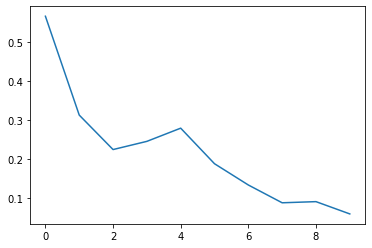

In [6]:
import matplotlib.pyplot as plt
plt.plot(loss_list)